In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.linear_model import LogisticRegression

In [3]:
titan=sns.load_dataset('titanic')
titan.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
titan.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titan.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

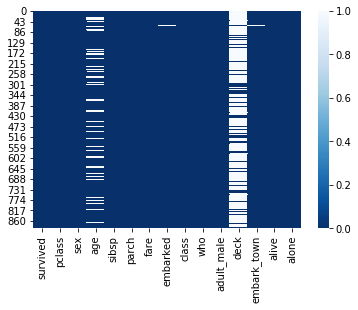

In [6]:
sns.heatmap(titan.isnull(), cbar=True, cmap='Blues_r')

#color name vul korle suggestion e sob olor name diye dei

In [7]:
titan['age'].isnull().sum()/titan.shape[0]*100

19.865319865319865

In [8]:
titan.shape[0]

891

<function matplotlib.pyplot.show(*args, **kw)>

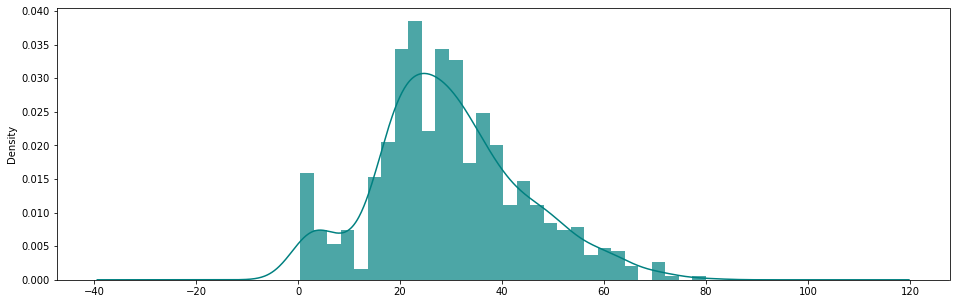

In [9]:
ax=titan['age'].hist(bins=30, density=True, stacked= True, color='teal', alpha=0.7, figsize=(16,5))
titan['age'].plot(kind='density', color='teal')
plt.show

In [10]:
titan['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [11]:
titan[titan['pclass']==1]['age'].mean()

38.233440860215055

In [12]:
titan[titan['pclass']==2]['age'].mean()

29.87763005780347

In [13]:
titan[titan['pclass']==3]['age'].mean()

25.14061971830986

In [14]:
titan['age']=titan['age'].fillna(titan['age'].mean())


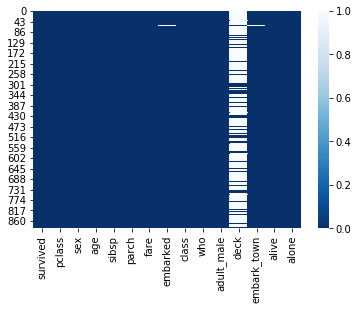

In [15]:
sns.heatmap(titan.isnull(), cbar=True, cmap='Blues_r')

In [16]:
titan['embarked'].isnull().sum()

2

In [17]:
titan['embark_town'].isnull().sum()

2

In [18]:
titan['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [19]:
#common_value='s'
#titan['embarked'].fillna(common_value,  inplace=True)

In [20]:
titan['embarked'].fillna(titan['embarked'].mode(),inplace=True)

In [21]:
titan['embarked'].isnull().sum()

2

In [22]:
titan.drop(labels=['deck','embark_town', 'alive'], inplace=True, axis=1)

In [ ]:
sns.heatmap(titan.isnull(), cbar=True, cmap='Blues_r')

In [ ]:
titan.info()

In [ ]:
#converting float to int


titan['age']=titan['age'].astype('int')
titan['fare']=titan['fare'].astype('int')
titan.info()



In [ ]:
##converting catagorical data to numerical data


genders={'male':0, 'female':1}
titan['sex']=titan['sex'].map(genders)

In [ ]:
who={'man':0, 'woman':1, 'child': 2}
titan['who']=titan['who'].map(who)

In [ ]:
alone={True:1,  False:0}
titan['alone']=titan['alone'].map(alone)

In [ ]:
ports={'S':0, 'C':1, 'Q':2}
titan['embarked']=titan['embarked'].map(ports)

In [ ]:
adult_male={True:1, False: 0}
titan['adult_male']=titan['adult_male'].map(adult_male)

In [ ]:
titan.drop(labels=['class'], inplace=True, axis=1)

In [ ]:
titan.head()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
x= titan.drop('survived', axis=1)
y=titan['survived']

x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.33, random_state= 42)

In [ ]:
x_train.shape

In [ ]:
model=LogisticRegression(solver='lbfgs', max_iter=400)
model.fit(x_train, y_train)
y_predict=model.predict(x_test)